#### Dicionário de dados

* `CustomerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa 
* `Gender`: gênero (masculino e feminino) 
* `SeniorCitizen`: informações sobre um cliente ter ou não idade igual ou maior que 65 anos 
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `Tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico 
* `MultipleLines`: assisnatura de mais de uma linha de telefone 
* `InternetService`: assinatura de um provedor internet 
* `OnlineSecurity`: assinatura adicional de segurança online 
* `OnlineBackup`: assinatura adicional de backup online 
* `DeviceProtection`: assinatura adicional de proteção no dispositivo 
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo 
* `StreamingMovies`: assinatura de streaming de filmes 
* `Contract`: tipo de contrato
* `PaperlessBilling`: se o cliente prefere receber online a fatura
* `PaymentMethod`: forma de pagamento
* `Charges.Monthly`: total de todos os serviços do cliente por mês
* `Charges.Total`: total gasto pelo cliente

### 1. Importação dos dados

In [1]:
import pandas as pd
import numpy as np
import json

data_json = json.load(open('data.json'))
data = pd.json_normalize(data_json)

data.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#### Verificando valores únicos para cada coluna

In [2]:
for col in data.columns:
    print(f"{col}: {data[col].unique()}")

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
customer.gender: ['Female' 'Male']
customer.SeniorCitizen: [0 1]
customer.Partner: ['Yes' 'No']
customer.Dependents: ['Yes' 'No']
customer.tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
phone.PhoneService: ['Yes' 'No']
phone.MultipleLines: ['No' 'Yes' 'No phone service']
internet.InternetService: ['DSL' 'Fiber optic' 'No']
internet.OnlineSecurity: ['No' 'Yes' 'No internet service']
internet.OnlineBackup: ['Yes' 'No' 'No internet service']
internet.DeviceProtection: ['No' 'Yes' 'No internet service']
internet.TechSupport: ['Yes' 'No' 'No internet service']
internet.StreamingTV: ['Yes' 'No' 'No internet service']
internet.StreamingMovies: ['No' 'Yes' 'No internet service']
account.Contrac

### 2. Tratamento dos dados

#### Renomenando variáveis

In [3]:
# Lista de prefixos que você deseja remover
prefixes = ["customer.", "internet.", "phone.", "customer.", "account."]

# Loop para renomear as colunas
for prefix in prefixes:
    data.columns = data.columns.str.replace(prefix, "", regex=False)



data.rename(columns={"gender": "Gender", "tenure": "Tenure"}, inplace=True)

data.head()

,customerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


##### Removendo variáveis irrelevantes

In [4]:
data.drop(columns=["customerID"], inplace=True)

#### Trocando valores das colunas

In [5]:
replace = {
    "Female": 1,
    "Male": 0,
    "Yes": 1,
    "No": 0,
    "": np.nan,
    ' ': np.nan,
    "No internet service": 2,
    "No phone service": 2,
}

data["Charges.Total"] = pd.to_numeric(data["Charges.Total"], errors='coerce')
data.replace(replace, inplace=True)

#### Transformação de Variáveis Categóricas em Dummy Variables

In [6]:
for col in data.columns:
    print(f"{col}: {data[col].unique()}")

Churn: [ 0.  1. nan]
Gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [1 0]
Tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
PhoneService: [1 0]
MultipleLines: [0 1 2]
InternetService: ['DSL' 'Fiber optic' 0]
OnlineSecurity: [0 1 2]
OnlineBackup: [1 0 2]
DeviceProtection: [0 1 2]
TechSupport: [1 0 2]
StreamingTV: [1 0 2]
StreamingMovies: [0 1 2]
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Charges.Monthly: [65.6  59.9  73.9  ... 91.75 68.8  67.85]
Charges.Total: [ 593.3   542.4   280.85 ...  742.9  4627.65 3707.6 ]


In [7]:
dummies = pd.get_dummies(data[["Contract", "PaymentMethod", "InternetService"]])
data.drop(columns=["Contract", "PaymentMethod", "InternetService"], inplace=True)

data = pd.concat([data, dummies], axis=1)


In [8]:
data.head()

,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_0,InternetService_DSL,InternetService_Fiber optic
0,0.0,1,0,1,1,9,1,0,0,1,...,False,True,False,False,False,False,True,False,True,False
1,0.0,0,0,0,0,9,1,1,0,0,...,True,False,False,False,False,False,True,False,True,False
2,1.0,0,0,0,0,4,1,0,0,0,...,True,False,False,False,False,True,False,False,False,True
3,1.0,0,1,1,0,13,1,0,0,1,...,True,False,False,False,False,True,False,False,False,True
4,1.0,1,1,1,0,3,1,0,0,0,...,True,False,False,False,False,False,True,False,False,True


#### Tratando valores vazios

In [9]:
data.isna().sum()

Churn                                      224
Gender                                       0
SeniorCitizen                                0
Partner                                      0
Dependents                                   0
Tenure                                       0
PhoneService                                 0
MultipleLines                                0
OnlineSecurity                               0
OnlineBackup                                 0
DeviceProtection                             0
TechSupport                                  0
StreamingTV                                  0
StreamingMovies                              0
PaperlessBilling                             0
Charges.Monthly                              0
Charges.Total                               11
Contract_Month-to-month                      0
Contract_One year                            0
Contract_Two year                            0
PaymentMethod_Bank transfer (automatic)      0
PaymentMethod

In [10]:
print(f"Number of rows: {data.shape[0]}")
empty_churn = data[data["Churn"].isna()]
data.dropna(inplace=True)
print(f"Number of rows after dropping empty churn: {data.shape[0]}")

Number of rows: 7267
Number of rows after dropping empty churn: 7032


#### Buscando outliers

In [11]:
### verificando outliers


#### Balanceamento dos dados

<Axes: xlabel='Churn', ylabel='count'>

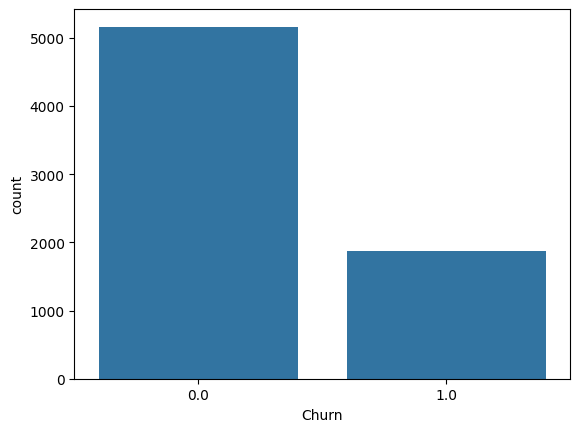

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Churn", data=data)

In [13]:
from imblearn.over_sampling import SMOTE
x = data.drop(columns=["Churn"])
y = data["Churn"]

smote = SMOTE()
x, y = smote.fit_resample(x, y)

data = pd.concat([x, y], axis=1)

<Axes: xlabel='Churn', ylabel='count'>

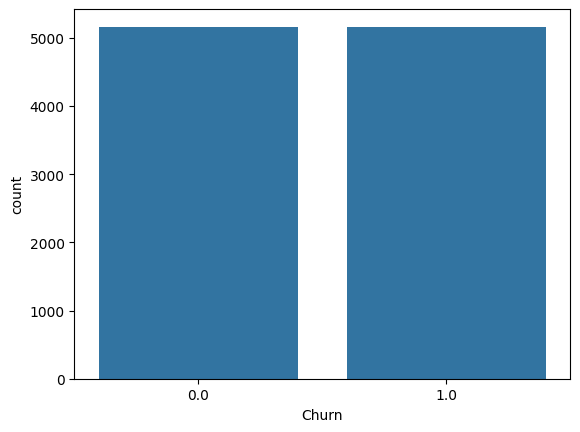

In [14]:
sns.countplot(x="Churn", data=data)

#### Obtendo matriz de correlação

<Axes: >

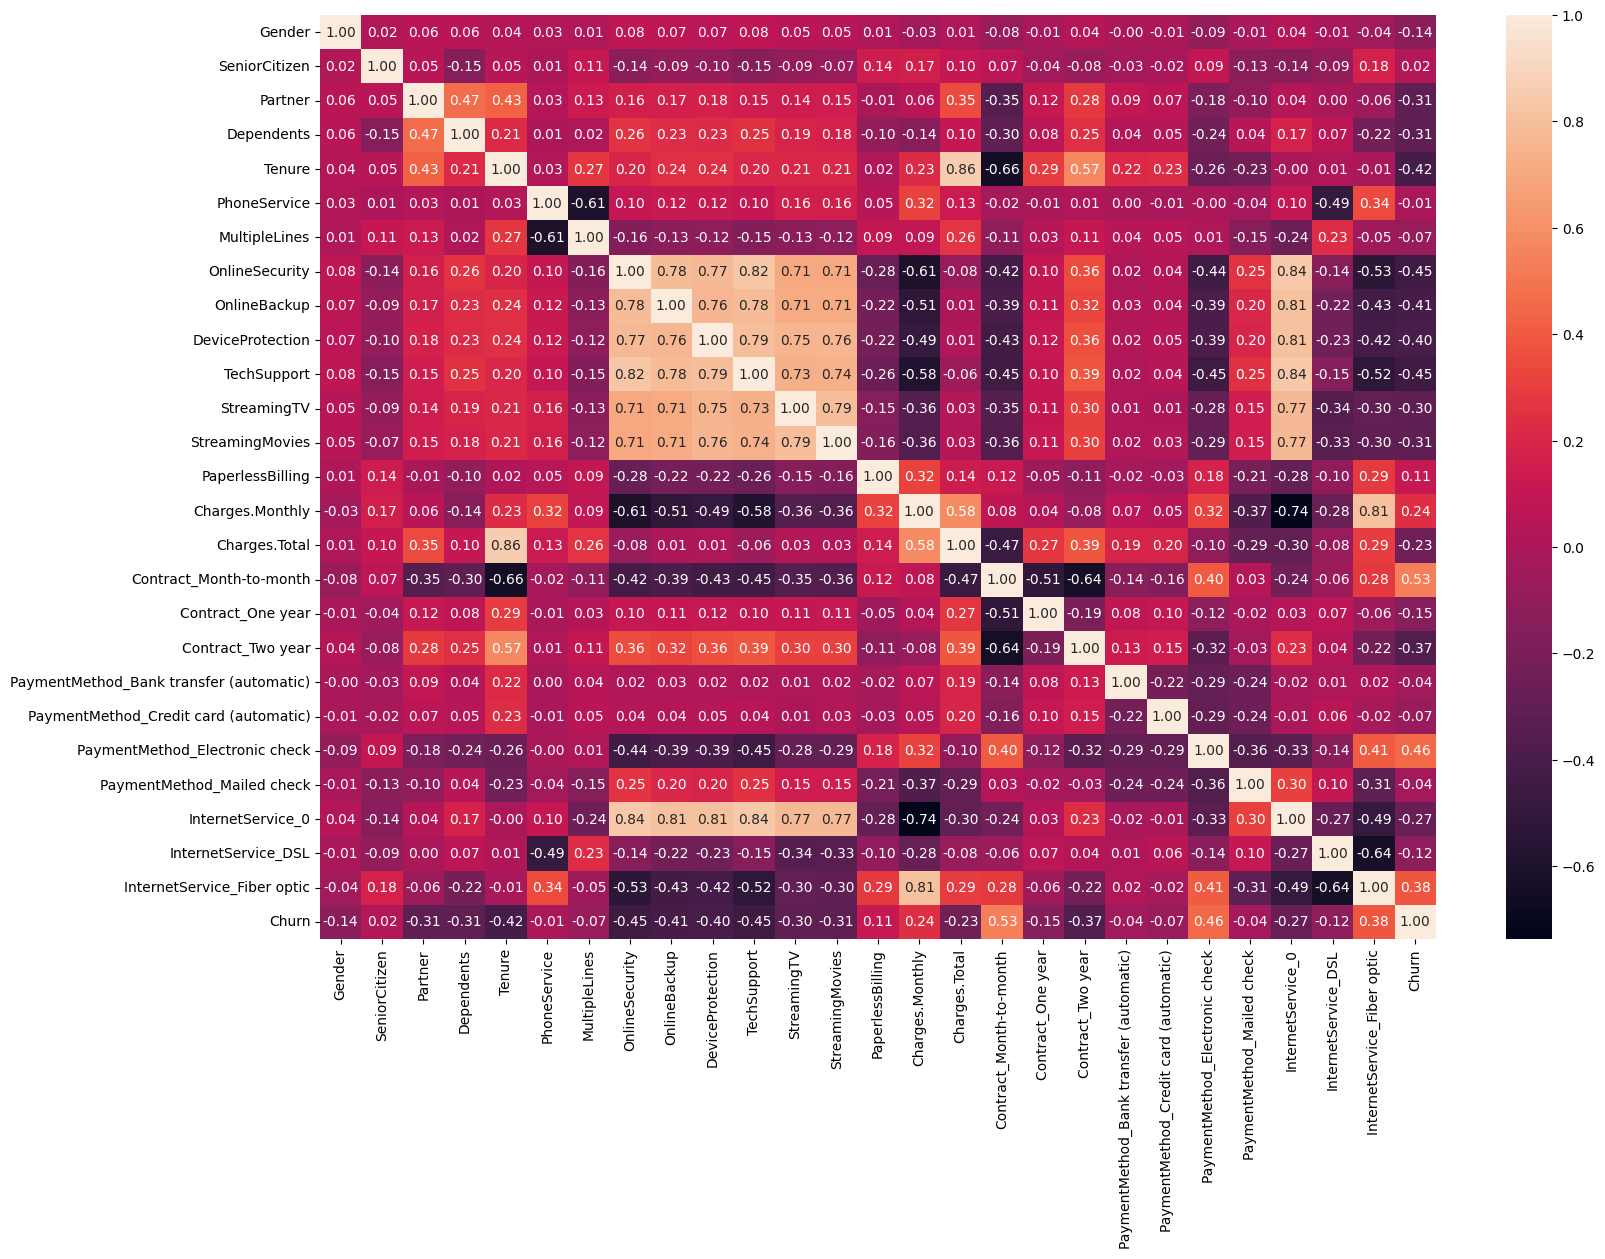

In [15]:
corr = data.corr()

plt.figure(figsize=(18, 12))
sns.heatmap(corr, annot=True, fmt=".2f")

<Axes: >

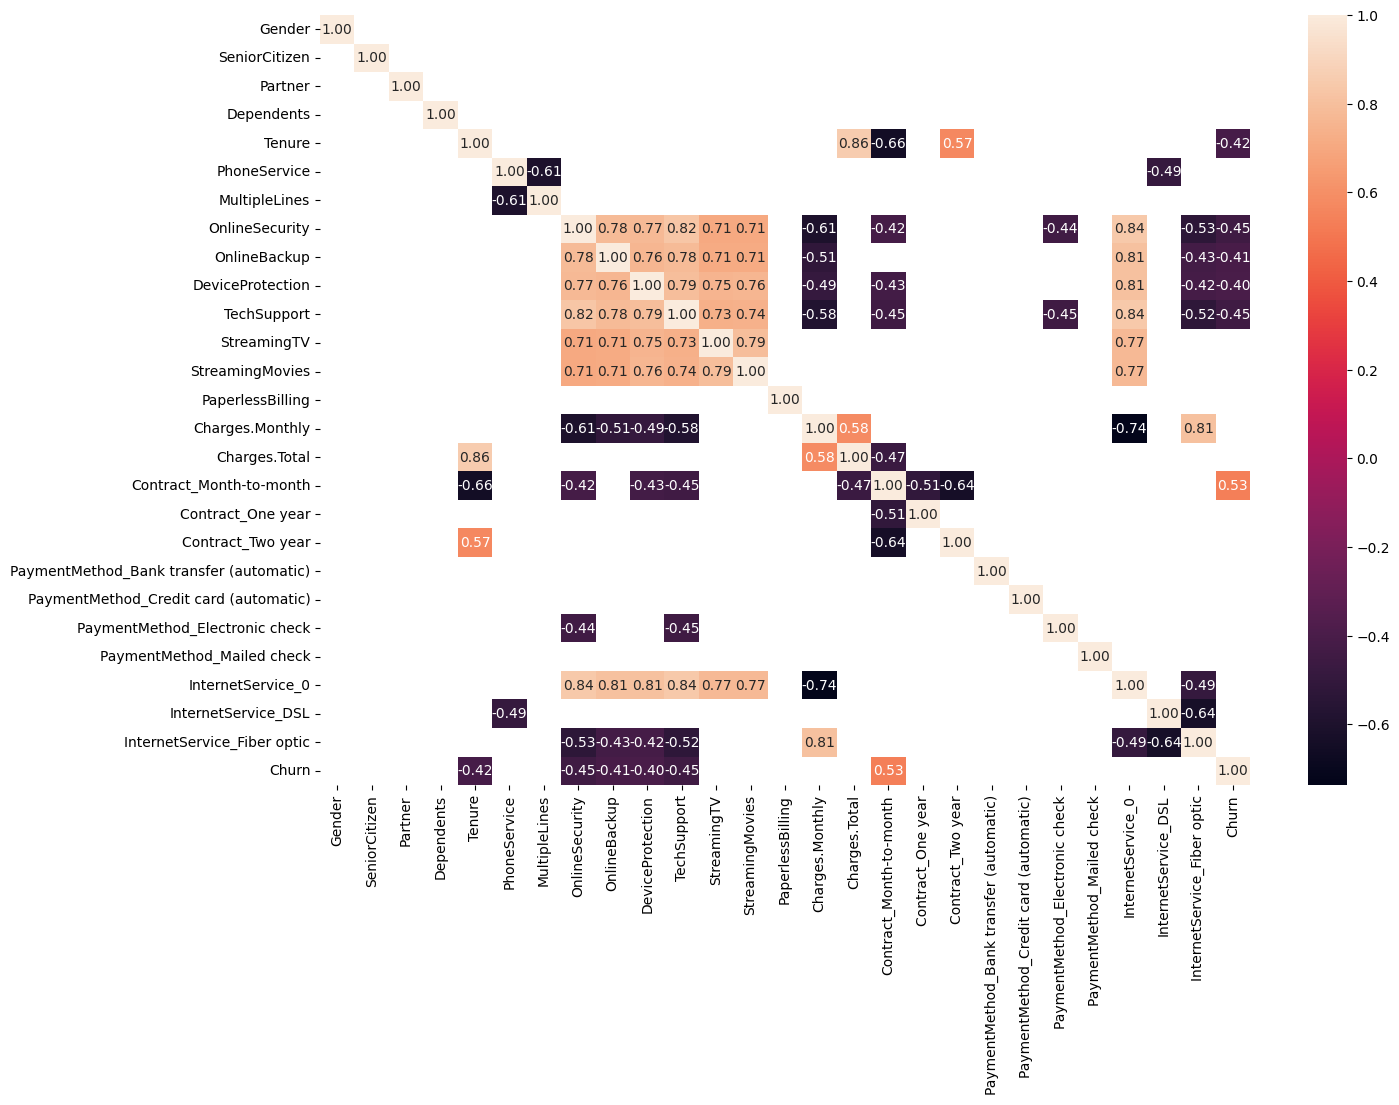

In [16]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], annot=True, fmt=".2f")

#### Separar dados de treino e teste

In [17]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=["Churn"])
y = data["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### 3. Modelagem

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import Normalizer, StandardScaler

#### Dummy Classifier

#### Random Forest Tree

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

grid = GridSearchCV(RandomForestClassifier(), param_grid={"n_estimators": [250, 300, 350, 400], "criterion":["gini", "entropy", "log_loss"]}, cv=KFold(n_splits=10, shuffle=True))
grid.fit(X_train, y_train)

grid.best_estimator_


# dt = Pipeline([("rfc", RandomForestClassifier())])
# accuracies = cross_val_score(dt, X_train, y_train, cv=KFold(n_splits=10, shuffle=True))

# mean_accuracy = accuracies.mean()
# standard_deviation = accuracies.std()


# print(f"Accuracy: {mean_accuracy*100:.2f}%")
# print(f"Variance: {(mean_accuracy - 2*standard_deviation)*100:.2f}% - {(mean_accuracy + 2*standard_deviation)*100:.2f}%")

RandomForestClassifier(criterion='entropy', n_estimators=400)